In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
train_df = pd.read_csv("./data/select-data.csv")
test_df = pd.read_csv("./data/scalar-test.csv")


数据来源于国外匿名化处理后的真实数据

RowNumber：行号  
CustomerID：用户编号  
Surname：用户姓名  
CreditScore：信用分数  
Geography：用户所在国家/地区  
Gender：用户性别  
Age：年龄  
Tenure：当了本银行多少年用户  
Balance：存贷款情况  
NumOfProducts：使用产品数量  
HasCrCard：是否有本行信用卡  
IsActiveMember：是否活跃用户  
EstimatedSalary：估计收入  
Exited：是否已流失，这将作为我们的标签数据

离散型变量都需要进行onehot编码  
Gender/Geography/HasCrCard/IsActiveMember 
Age/CreditScore/EB/EstimatedSalary/NumOfProducts/Tenure 已经做过标准化

In [3]:
train_df.head()

,Unnamed: 0,Age,CreditScore,EB,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
0,0,0.324324,0.538,0.000000,0.506735,0,0.0,1,1,0.000000,0.2,1
1,1,0.310811,0.516,0.000070,0.562709,0,0.5,0,1,0.000000,0.1,0
2,2,0.324324,0.304,0.000132,0.569654,0,0.0,1,0,0.666667,0.8,1
3,3,0.283784,0.698,0.000000,0.469120,0,0.0,0,0,0.333333,0.1,0
4,4,0.337838,1.000,0.000150,0.395400,0,0.5,1,1,0.000000,0.2,0


In [4]:
test_df.head()

,Unnamed: 0,Geography,Gender,EB,Age,EstimatedSalary,NumOfProducts,CreditScore,Tenure,HasCrCard,IsActiveMember,Exited
0,0,0.0,1.0,0.000000,0.178082,0.101298,0.000000,0.411157,0.1,0.0,1.0,0.0
1,1,0.0,1.0,0.000000,0.219178,0.019060,0.000000,0.419421,0.4,0.0,1.0,0.0
2,2,0.0,0.0,0.000000,0.027397,0.644939,0.333333,0.626033,0.7,1.0,0.0,0.0
3,3,0.0,1.0,0.004121,0.287671,0.406481,0.000000,0.677686,0.4,1.0,1.0,0.0
4,4,0.5,1.0,0.001127,0.136986,0.939612,0.000000,0.285124,1.0,1.0,1.0,0.0


In [5]:
train_data = train_df.drop(train_df.columns[[0]],axis=1,inplace=False)
test_data = test_df.drop(train_df.columns[[0]],axis=1,inplace=False)

In [6]:
train_data.head()

,Age,CreditScore,EB,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
0,0.324324,0.538,0.000000,0.506735,0,0.0,1,1,0.000000,0.2,1
1,0.310811,0.516,0.000070,0.562709,0,0.5,0,1,0.000000,0.1,0
2,0.324324,0.304,0.000132,0.569654,0,0.0,1,0,0.666667,0.8,1
3,0.283784,0.698,0.000000,0.469120,0,0.0,0,0,0.333333,0.1,0
4,0.337838,1.000,0.000150,0.395400,0,0.5,1,1,0.000000,0.2,0


In [7]:
test_data.head()

,Geography,Gender,EB,Age,EstimatedSalary,NumOfProducts,CreditScore,Tenure,HasCrCard,IsActiveMember,Exited
0,0.0,1.0,0.000000,0.178082,0.101298,0.000000,0.411157,0.1,0.0,1.0,0.0
1,0.0,1.0,0.000000,0.219178,0.019060,0.000000,0.419421,0.4,0.0,1.0,0.0
2,0.0,0.0,0.000000,0.027397,0.644939,0.333333,0.626033,0.7,1.0,0.0,0.0
3,0.0,1.0,0.004121,0.287671,0.406481,0.000000,0.677686,0.4,1.0,1.0,0.0
4,0.5,1.0,0.001127,0.136986,0.939612,0.000000,0.285124,1.0,1.0,1.0,0.0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8149 entries, 0 to 8148
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              8149 non-null   float64
 1   CreditScore      8149 non-null   float64
 2   EB               8149 non-null   float64
 3   EstimatedSalary  8149 non-null   float64
 4   Gender           8149 non-null   int64  
 5   Geography        8149 non-null   float64
 6   HasCrCard        8149 non-null   int64  
 7   IsActiveMember   8149 non-null   int64  
 8   NumOfProducts    8149 non-null   float64
 9   Tenure           8149 non-null   float64
 10  Exited           8149 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 700.4 KB


In [9]:
cColumnList = train_data[['Age','CreditScore','EB','EstimatedSalary','NumOfProducts','Tenure']]
cColumnList

cColumnListTest = test_data[['Age','CreditScore','EB','EstimatedSalary','NumOfProducts','Tenure']]
cColumnListTest

,Age,CreditScore,EB,EstimatedSalary,NumOfProducts,Tenure
0,0.178082,0.411157,0.000000,0.101298,0.000000,0.1
1,0.219178,0.419421,0.000000,0.019060,0.000000,0.4
2,0.027397,0.626033,0.000000,0.644939,0.333333,0.7
3,0.287671,0.677686,0.004121,0.406481,0.000000,0.4
4,0.136986,0.285124,0.001127,0.939612,0.000000,1.0
...,...,...,...,...,...,...
995,0.219178,0.340909,0.008635,0.131640,0.000000,1.0
996,0.424658,0.431818,0.106347,0.011246,0.000000,0.2
997,0.767123,0.318182,0.000000,0.132894,0.000000,0.4
998,0.068493,0.638430,0.000000,0.812970,0.333333,0.8


In [10]:
oneHotColumnList = pd.DataFrame(OneHotEncoder().fit_transform(
                train_data[['Gender','Geography','HasCrCard','IsActiveMember']]).toarray()
                )
oneHotColumnList



oneHotColumnListTest = pd.DataFrame(OneHotEncoder().fit_transform(
                test_data[['Gender','Geography','HasCrCard','IsActiveMember']]).toarray()
                )
oneHotColumnListTest

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
997,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
998,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [11]:
dataX = pd.concat([cColumnList, oneHotColumnList], axis=1) 
dataX

dataXTest = pd.concat([cColumnListTest, oneHotColumnListTest], axis=1) 
dataXTest

,Age,CreditScore,EB,EstimatedSalary,NumOfProducts,Tenure,0,1,2,3,4,5,6,7,8
0,0.178082,0.411157,0.000000,0.101298,0.000000,0.1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.219178,0.419421,0.000000,0.019060,0.000000,0.4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.027397,0.626033,0.000000,0.644939,0.333333,0.7,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.287671,0.677686,0.004121,0.406481,0.000000,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.136986,0.285124,0.001127,0.939612,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.219178,0.340909,0.008635,0.131640,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.424658,0.431818,0.106347,0.011246,0.000000,0.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
997,0.767123,0.318182,0.000000,0.132894,0.000000,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
998,0.068493,0.638430,0.000000,0.812970,0.333333,0.8,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [12]:
x_train = dataX
x_train
y_train = train_data[['Exited']]
y_train
x_train,x_valid,y_train,y_valid= train_test_split(x_train,y_train,test_size=0.2)
x_test = dataXTest
y_test = test_data[['Exited']]

In [13]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                min_delta=0.0001,
                                                patience=50, 
                                                mode='auto',
                                                baseline=None, 
                                                restore_best_weights=False,
                                                verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                 patience=1,
                                                 verbose=1,
                                                 factor = 0.1)

checkpoint_save_path = "./checkpoint/cmLapsed.ckpt"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                monitor='loss', 
                                                save_weights_only=True,
                                                verbose=1,
                                                save_best_only=True,
                                                save_freq='epoch',
                                                mode = 'min',
                                                max_to_keep=10)


In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2,activation='softmax')
])


if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
    
    

lr = 1e-3
epochs = 500
batch_size = 128
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
   
history = model.fit(x_train, 
                    y_train,
                    epochs=epochs,
                    callbacks=[checkpoint], ## early_stopping,reduce_lr
                    batch_size=batch_size,
                    validation_data=(x_valid, y_valid)
                   ) 


Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

32/51 [=================>............] - ETA: 0s - loss: 0.6450 - accuracy: 0.6184
Epoch 00001: loss improved from inf to 0.63865, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.6286 - val_loss: 0.6167 - val_accuracy: 0.6699
Epoch 2/500
33/51 [==================>...........] - ETA: 0s - loss: 0.6009 - accuracy: 0.6854
Epoch 00002: loss improved from 0.63865 to 0.59679, saving model to ./checkpoint\cmLapsed.ckpt
51/

30/51 [================>.............] - ETA: 0s - loss: 0.4591 - accuracy: 0.7763
Epoch 00025: loss did not improve from 0.46088
51/51 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7782 - val_loss: 0.4854 - val_accuracy: 0.7699
Epoch 26/500
30/51 [================>.............] - ETA: 0s - loss: 0.4619 - accuracy: 0.7797
Epoch 00026: loss improved from 0.46088 to 0.46027, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.7806 - val_loss: 0.4751 - val_accuracy: 0.7767
Epoch 27/500
29/51 [================>.............] - ETA: 0s - loss: 0.4489 - accuracy: 0.7810
Epoch 00027: loss improved from 0.46027 to 0.45747, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.7813 - val_loss: 0.4764 - val_accuracy: 0.7669
Epoch 28/500
50/51 [============================>.] - ETA: 0s - loss: 0.4572 - accuracy: 0.7750
Epoch

Epoch 54/500
31/51 [=================>............] - ETA: 0s - loss: 0.4262 - accuracy: 0.7966
Epoch 00054: loss improved from 0.42959 to 0.42650, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.7984 - val_loss: 0.4635 - val_accuracy: 0.7706
Epoch 55/500
31/51 [=================>............] - ETA: 0s - loss: 0.4270 - accuracy: 0.7994
Epoch 00055: loss did not improve from 0.42650
51/51 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.7971 - val_loss: 0.4691 - val_accuracy: 0.7620
Epoch 56/500
32/51 [=================>............] - ETA: 0s - loss: 0.4245 - accuracy: 0.8003
Epoch 00056: loss did not improve from 0.42650
51/51 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.7948 - val_loss: 0.4614 - val_accuracy: 0.7681
Epoch 57/500
32/51 [=================>............] - ETA: 0s - loss: 0.4279 - accuracy: 0.8010
Epoch 00057: loss improved from 0.42650 

32/51 [=================>............] - ETA: 0s - loss: 0.4055 - accuracy: 0.8030
Epoch 00082: loss did not improve from 0.39889
51/51 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8033 - val_loss: 0.4548 - val_accuracy: 0.7681
Epoch 83/500
29/51 [================>.............] - ETA: 0s - loss: 0.4117 - accuracy: 0.7998
Epoch 00083: loss did not improve from 0.39889
51/51 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8083 - val_loss: 0.4574 - val_accuracy: 0.7761
Epoch 84/500
30/51 [================>.............] - ETA: 0s - loss: 0.4010 - accuracy: 0.8130
Epoch 00084: loss improved from 0.39889 to 0.39364, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8176 - val_loss: 0.4599 - val_accuracy: 0.7742
Epoch 85/500
31/51 [=================>............] - ETA: 0s - loss: 0.3874 - accuracy: 0.8191
Epoch 00085: loss did not improve from 0.39364
51/51 

30/51 [================>.............] - ETA: 0s - loss: 0.3715 - accuracy: 0.8258
Epoch 00110: loss improved from 0.37765 to 0.37502, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8213 - val_loss: 0.4499 - val_accuracy: 0.7828
Epoch 111/500
32/51 [=================>............] - ETA: 0s - loss: 0.3754 - accuracy: 0.8220
Epoch 00111: loss did not improve from 0.37502
51/51 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8237 - val_loss: 0.4475 - val_accuracy: 0.7816
Epoch 112/500
31/51 [=================>............] - ETA: 0s - loss: 0.3768 - accuracy: 0.8256
Epoch 00112: loss improved from 0.37502 to 0.37363, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.3736 - accuracy: 0.8262 - val_loss: 0.4533 - val_accuracy: 0.7767
Epoch 113/500
31/51 [=================>............] - ETA: 0s - loss: 0.3702 - accuracy: 0.8246
Ep

32/51 [=================>............] - ETA: 0s - loss: 0.3447 - accuracy: 0.8345
Epoch 00138: loss improved from 0.35047 to 0.34912, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8339 - val_loss: 0.4514 - val_accuracy: 0.7883
Epoch 139/500
31/51 [=================>............] - ETA: 0s - loss: 0.3476 - accuracy: 0.8349
Epoch 00139: loss improved from 0.34912 to 0.34808, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8379 - val_loss: 0.4473 - val_accuracy: 0.7853
Epoch 140/500
31/51 [=================>............] - ETA: 0s - loss: 0.3398 - accuracy: 0.8443
Epoch 00140: loss improved from 0.34808 to 0.34582, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8386 - val_loss: 0.4499 - val_accuracy: 0.7834
Epoch 141/500
32/51 [=================>............

Epoch 166/500
31/51 [=================>............] - ETA: 0s - loss: 0.3212 - accuracy: 0.8569
Epoch 00166: loss improved from 0.32659 to 0.32431, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8511 - val_loss: 0.4530 - val_accuracy: 0.7908
Epoch 167/500
28/51 [===============>..............] - ETA: 0s - loss: 0.3164 - accuracy: 0.8585
Epoch 00167: loss did not improve from 0.32431
51/51 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8515 - val_loss: 0.4526 - val_accuracy: 0.7847
Epoch 168/500
31/51 [=================>............] - ETA: 0s - loss: 0.3246 - accuracy: 0.8448
Epoch 00168: loss improved from 0.32431 to 0.32283, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8497 - val_loss: 0.4524 - val_accuracy: 0.7920
Epoch 169/500
31/51 [=================>............] - ETA: 0s - loss: 0.3152 - accur

Epoch 195/500
28/51 [===============>..............] - ETA: 0s - loss: 0.2908 - accuracy: 0.8675
Epoch 00195: loss did not improve from 0.30617
51/51 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8599 - val_loss: 0.4509 - val_accuracy: 0.8025
Epoch 196/500
31/51 [=================>............] - ETA: 0s - loss: 0.3029 - accuracy: 0.8627
Epoch 00196: loss did not improve from 0.30617
51/51 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8616 - val_loss: 0.4525 - val_accuracy: 0.8000
Epoch 197/500
31/51 [=================>............] - ETA: 0s - loss: 0.3046 - accuracy: 0.8551
Epoch 00197: loss did not improve from 0.30617
51/51 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8546 - val_loss: 0.4537 - val_accuracy: 0.8049
Epoch 198/500
31/51 [=================>............] - ETA: 0s - loss: 0.3099 - accuracy: 0.8627
Epoch 00198: loss did not improve from 0.30617
51/51 [==============================

31/51 [=================>............] - ETA: 0s - loss: 0.2888 - accuracy: 0.8732
Epoch 00224: loss improved from 0.28663 to 0.28547, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8747 - val_loss: 0.4542 - val_accuracy: 0.8031
Epoch 225/500
29/51 [================>.............] - ETA: 0s - loss: 0.2838 - accuracy: 0.8712
Epoch 00225: loss improved from 0.28547 to 0.28522, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2852 - accuracy: 0.8707 - val_loss: 0.4589 - val_accuracy: 0.8092
Epoch 226/500
27/51 [==============>...............] - ETA: 0s - loss: 0.2972 - accuracy: 0.8695
Epoch 00226: loss improved from 0.28522 to 0.28512, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.8736 - val_loss: 0.4604 - val_accuracy: 0.8061
Epoch 227/500
32/51 [=================>............

Epoch 00252: loss did not improve from 0.26855
51/51 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8767 - val_loss: 0.4681 - val_accuracy: 0.8037
Epoch 253/500
30/51 [================>.............] - ETA: 0s - loss: 0.2661 - accuracy: 0.8807
Epoch 00253: loss improved from 0.26855 to 0.26755, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.8800 - val_loss: 0.4663 - val_accuracy: 0.8037
Epoch 254/500
32/51 [=================>............] - ETA: 0s - loss: 0.2633 - accuracy: 0.8882
Epoch 00254: loss did not improve from 0.26755
51/51 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8800 - val_loss: 0.4627 - val_accuracy: 0.8043
Epoch 255/500
31/51 [=================>............] - ETA: 0s - loss: 0.2749 - accuracy: 0.8712
Epoch 00255: loss did not improve from 0.26755
51/51 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8767

Epoch 282/500
31/51 [=================>............] - ETA: 0s - loss: 0.2484 - accuracy: 0.8896
Epoch 00282: loss did not improve from 0.25516
51/51 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8836 - val_loss: 0.4719 - val_accuracy: 0.8061
Epoch 283/500
27/51 [==============>...............] - ETA: 0s - loss: 0.2473 - accuracy: 0.8903
Epoch 00283: loss improved from 0.25516 to 0.25039, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.8879 - val_loss: 0.4696 - val_accuracy: 0.8061
Epoch 284/500
30/51 [================>.............] - ETA: 0s - loss: 0.2519 - accuracy: 0.8891
Epoch 00284: loss did not improve from 0.25039
51/51 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.8834 - val_loss: 0.4684 - val_accuracy: 0.7957
Epoch 285/500
27/51 [==============>...............] - ETA: 0s - loss: 0.2537 - accuracy: 0.8883
Epoch 00285: loss did not improve fr

27/51 [==============>...............] - ETA: 0s - loss: 0.2597 - accuracy: 0.8808
Epoch 00311: loss did not improve from 0.24208
51/51 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.8877 - val_loss: 0.4588 - val_accuracy: 0.8080
Epoch 312/500
51/51 [==============================] - ETA: 0s - loss: 0.2427 - accuracy: 0.8940
Epoch 00312: loss did not improve from 0.24208
51/51 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.8940 - val_loss: 0.4567 - val_accuracy: 0.8147
Epoch 313/500
26/51 [==============>...............] - ETA: 0s - loss: 0.2275 - accuracy: 0.9011
Epoch 00313: loss improved from 0.24208 to 0.24039, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.8902 - val_loss: 0.4706 - val_accuracy: 0.8086
Epoch 314/500
28/51 [===============>..............] - ETA: 0s - loss: 0.2473 - accuracy: 0.8968
Epoch 00314: loss did not improve from 0.24039
51/

Epoch 340/500
31/51 [=================>............] - ETA: 0s - loss: 0.2334 - accuracy: 0.8926
Epoch 00340: loss did not improve from 0.22897
51/51 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8931 - val_loss: 0.4664 - val_accuracy: 0.8184
Epoch 341/500
31/51 [=================>............] - ETA: 0s - loss: 0.2309 - accuracy: 0.8982
Epoch 00341: loss improved from 0.22897 to 0.22613, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9011 - val_loss: 0.4758 - val_accuracy: 0.8147
Epoch 342/500
31/51 [=================>............] - ETA: 0s - loss: 0.2282 - accuracy: 0.9050
Epoch 00342: loss did not improve from 0.22613
51/51 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9026 - val_loss: 0.4728 - val_accuracy: 0.8166
Epoch 343/500
30/51 [================>.............] - ETA: 0s - loss: 0.2344 - accuracy: 0.8990
Epoch 00343: loss did not improve fr

Epoch 369/500
31/51 [=================>............] - ETA: 0s - loss: 0.2148 - accuracy: 0.9103
Epoch 00369: loss improved from 0.22035 to 0.21818, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9064 - val_loss: 0.4715 - val_accuracy: 0.8202
Epoch 370/500
31/51 [=================>............] - ETA: 0s - loss: 0.2261 - accuracy: 0.8944
Epoch 00370: loss did not improve from 0.21818
51/51 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9000 - val_loss: 0.4889 - val_accuracy: 0.8172
Epoch 371/500
31/51 [=================>............] - ETA: 0s - loss: 0.2193 - accuracy: 0.9057
Epoch 00371: loss did not improve from 0.21818
51/51 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9008 - val_loss: 0.4888 - val_accuracy: 0.8135
Epoch 372/500
32/51 [=================>............] - ETA: 0s - loss: 0.2175 - accuracy: 0.9109
Epoch 00372: loss did not improve fr

Epoch 398/500
31/51 [=================>............] - ETA: 0s - loss: 0.1950 - accuracy: 0.9103
Epoch 00398: loss improved from 0.20721 to 0.20600, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9070 - val_loss: 0.4908 - val_accuracy: 0.8141
Epoch 399/500
31/51 [=================>............] - ETA: 0s - loss: 0.2035 - accuracy: 0.9100
Epoch 00399: loss did not improve from 0.20600
51/51 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9047 - val_loss: 0.4835 - val_accuracy: 0.8190
Epoch 400/500
30/51 [================>.............] - ETA: 0s - loss: 0.2135 - accuracy: 0.9044
Epoch 00400: loss did not improve from 0.20600
51/51 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9072 - val_loss: 0.4870 - val_accuracy: 0.8227
Epoch 401/500
29/51 [================>.............] - ETA: 0s - loss: 0.2068 - accuracy: 0.9057
Epoch 00401: loss did not improve fr

Epoch 427/500
50/51 [============================>.] - ETA: 0s - loss: 0.2033 - accuracy: 0.9117
Epoch 00427: loss did not improve from 0.19795
51/51 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9123 - val_loss: 0.4899 - val_accuracy: 0.8190
Epoch 428/500
25/51 [=============>................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9162
Epoch 00428: loss improved from 0.19795 to 0.19645, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9158 - val_loss: 0.5040 - val_accuracy: 0.8153
Epoch 429/500
29/51 [================>.............] - ETA: 0s - loss: 0.2071 - accuracy: 0.9103
Epoch 00429: loss did not improve from 0.19645
51/51 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9147 - val_loss: 0.4942 - val_accuracy: 0.8209
Epoch 430/500
31/51 [=================>............] - ETA: 0s - loss: 0.1927 - accuracy: 0.9171
Epoch 00430: loss did not improve fr

28/51 [===============>..............] - ETA: 0s - loss: 0.1907 - accuracy: 0.9191
Epoch 00456: loss did not improve from 0.18914
51/51 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9201 - val_loss: 0.5186 - val_accuracy: 0.8245
Epoch 457/500
27/51 [==============>...............] - ETA: 0s - loss: 0.1817 - accuracy: 0.9204
Epoch 00457: loss did not improve from 0.18914
51/51 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9182 - val_loss: 0.5035 - val_accuracy: 0.8252
Epoch 458/500
30/51 [================>.............] - ETA: 0s - loss: 0.1711 - accuracy: 0.9286
Epoch 00458: loss improved from 0.18914 to 0.18302, saving model to ./checkpoint\cmLapsed.ckpt
51/51 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.9225 - val_loss: 0.5052 - val_accuracy: 0.8276
Epoch 459/500
27/51 [==============>...............] - ETA: 0s - loss: 0.1861 - accuracy: 0.9207
Epoch 00459: loss did not improve from 0.18302
51/

Epoch 486/500
30/51 [================>.............] - ETA: 0s - loss: 0.1844 - accuracy: 0.9187
Epoch 00486: loss did not improve from 0.17873
51/51 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9190 - val_loss: 0.5208 - val_accuracy: 0.8202
Epoch 487/500
30/51 [================>.............] - ETA: 0s - loss: 0.1877 - accuracy: 0.9169
Epoch 00487: loss did not improve from 0.17873
51/51 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9224 - val_loss: 0.5051 - val_accuracy: 0.8294
Epoch 488/500
31/51 [=================>............] - ETA: 0s - loss: 0.1770 - accuracy: 0.9211
Epoch 00488: loss did not improve from 0.17873
51/51 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9225 - val_loss: 0.5101 - val_accuracy: 0.8313
Epoch 489/500
31/51 [=================>............] - ETA: 0s - loss: 0.1828 - accuracy: 0.9196
Epoch 00489: loss did not improve from 0.17873
51/51 [==============================

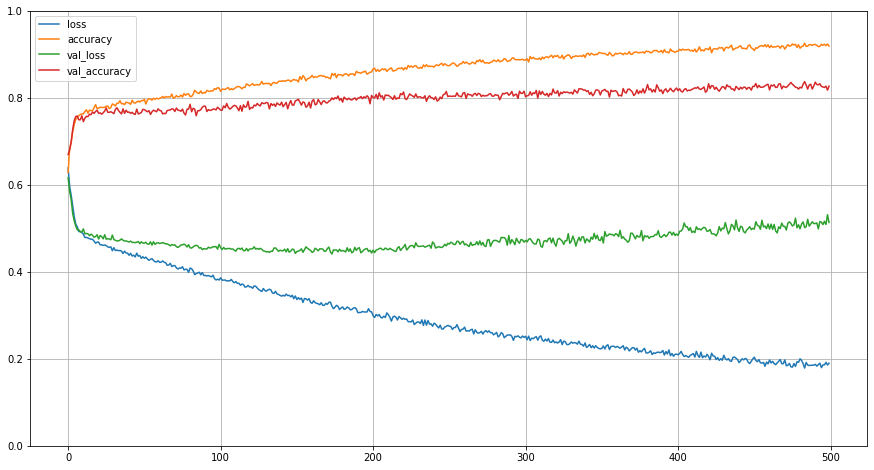

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(15, 8))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [23]:
history.history


{'loss': [0.6386492252349854,
  0.5967915058135986,
  0.5760450959205627,
  0.550946056842804,
  0.5272944569587708,
  0.5097776651382446,
  0.5035027265548706,
  0.4926946461200714,
  0.4927380383014679,
  0.4902057945728302,
  0.4865511953830719,
  0.4790525436401367,
  0.4790154695510864,
  0.4780500829219818,
  0.47615212202072144,
  0.4751397967338562,
  0.47491276264190674,
  0.4707607328891754,
  0.4658941924571991,
  0.4681589901447296,
  0.46849098801612854,
  0.4621637463569641,
  0.4621751606464386,
  0.4608822166919708,
  0.4618435502052307,
  0.4602714478969574,
  0.45747414231300354,
  0.45627304911613464,
  0.45744630694389343,
  0.448591411113739,
  0.4555709660053253,
  0.4489985704421997,
  0.450141042470932,
  0.4486364722251892,
  0.4489694833755493,
  0.4478601813316345,
  0.44208791851997375,
  0.4475579261779785,
  0.44346123933792114,
  0.44296637177467346,
  0.43803921341896057,
  0.4427184760570526,
  0.4364130198955536,
  0.43829599022865295,
  0.434326648712

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4096      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 70,402
Trainable params: 70,402
Non-trainable params: 0
_________________________________________________________________


In [25]:
file = open('./cmLapsed_weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

In [26]:
model.evaluate(x_test, y_test,verbose=2)

32/32 - 0s - loss: 1.1573 - accuracy: 0.7370


[1.1573482751846313, 0.7369999885559082]

In [27]:
def normalize_feature(df):
    """
    PS : 要求传入的df是连续性变量
    
    Applies function along input axis(default 0) of DataFrame
    标准化方法有多种：
    归一化Max-Min
    实现中心化Z-Score
    用于稀疏数据的MaxAbs
    针对离群点的RobustScaler
    
    """
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放 z-score 标准化(zero-mean normalization)